<a href="https://colab.research.google.com/github/rroszczyk/1DI2243/blob/main/dekonwolucja_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from matplotlib import cm

In [ ]:
class ColorDeconvolution:
    def __init__(self, img,path):
        self.img_0 = img
        self.stains = None
        self.od = None
        self.path=path
        self.path2 = "."

    def getStains(self):
        return self.stains

    def setImage(self, img):
        if img != None:
            self.img_0 = img

    def RGB_2_OD(self):
        [l, c, d] = self.img_0.shape
        self.od = np.zeros([l, c, d])
        for i in range(l):
            for j in range(c):
                for k in range(d):
                    if self.img_0[i,j,k] != 0 :
                        self.od[i,j,k] = np.log(self.img_0[i, j, k])
        return self.od

    def norm(self, vector):
        n = 0
        for i in vector:
            n = n + np.square(i)
        return np.sqrt(n)

    def separateStain(self):

        He = np.array([0.6500286, 0.704031, 0.2860126])       # Hematoxylin
        Eo = np.array([0.07, 0.99, 0.11])                     # Eosine
        DAB = np.array([0.26814753, 0.57031375, 0.77642715])  
        Res = np.array([0.7110272, 0.42318153, 0.5615672])    

    
        HDABtoRGB = np.array([He / self.norm(He), Eo / self.norm(Eo), DAB / self.norm(DAB)])
        RGBtoHDAB = np.linalg.inv(HDABtoRGB)


        [l,c,d] = self.img_0.shape
        self.stains = np.zeros([l, c, d])
        for i in range(l):
            for j in range(c):
                a = np.dot(self.od[i, j], RGBtoHDAB)
                b=self.od[i,j]
                self.stains[i, j, 0] = a[0]
                self.stains[i, j, 1] = a[1]
                self.stains[i, j, 2] = a[2]
        return self.stains
    
    def binarisation(self,image):
        blur = cv2.GaussianBlur(image, (5, 5), 0)
        ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return th3

    def showStains(self):
        plt.subplot(1, 4, 1)
        plt.title("original")
        plt.imshow(self.img_0)

        plt.subplot(1, 4, 2)
        plt.title('Hematoxylin')
        plt.imshow(self.stains[:, :, 0], cmap="gray")
        self.saveOpencv((self.stains[:, :, 0]*255).astype(np.uint8), " colorDeconvolution_Hematoxylin.tif")

        plt.subplot(1, 4, 3)
        plt.title('Eosine')
        plt.imshow(self.stains[:, :, 1], cmap="gray")
        self.saveOpencv((self.stains[:, :, 1]*255).astype(np.uint8), " colorDeconvolution_Eosin.tif")

        plt.subplot(1, 4, 4)
        plt.title('DAB')
        plt.imshow(self.stains[:, :, 2], cmap="gray")
        self.saveOpencv((self.stains[:, :, 2]*255).astype(np.uint8)," colorDeconvolution_DAB.tif")

        plt.show()
        self.binarisation()


    def saveOpencv(self,img,path):
        cv2.imwrite(self.path2 + "/" + self.path[19:] + "/" + path, img)

    def savePillow(self,img,path):
        img_to_save = Image.fromarray(img)
        img_to_save.save(path)

    def binarisation(self):
        blur1 = cv2.GaussianBlur((self.stains[:, :, 0] * 255).astype(np.uint8), (5, 5), 0)
        ret1, th1 = cv2.threshold(blur1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        blur2 = cv2.GaussianBlur((self.stains[:, :, 1] * 255).astype(np.uint8), (5, 5), 0)
        ret2, th2 = cv2.threshold(blur2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        blur3 = cv2.GaussianBlur((self.stains[:, :, 2] * 255).astype(np.uint8), (5, 5), 0)
        ret3, th3 = cv2.threshold(blur3, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        plt.subplot(1, 3, 1)
        plt.title("Hematoxyline")
        plt.imshow(th1,cmap="gray")
        plt.subplot(1, 3, 2)
        plt.title("Eosine")
        plt.imshow(th2,cmap="gray")
        plt.subplot(1, 3, 3)
        plt.title("DAB")
        plt.imshow(th3,cmap="gray")

        plt.show()
        self.saveOpencv(th1, "Hematoxyline.png")
        self.saveOpencv(th2, "Eosine.png")
        self.saveOpencv(th3, "DAB.png")
        return th3

    def saveOpencv(self,img, path):
        cv2.imwrite(self.path2 + "/" + self.path[19:] + "/" + path, img)

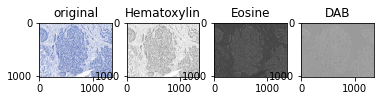

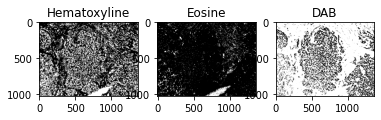

In [ ]:
path = "arn2.tif"
img = plt.imread(path)
img = img[:, :, 0:3]


satin = ColorDeconvolution(img,path)
satin.RGB_2_OD()
image=satin.separateStain()
satin.showStains()